# **Predicting Filipino Students' Employability Based on Mock Interview Results**

The following machine learning project aims to analyze and predict Filipino students' employability based on their mock interview results which are scaled from 1 - 5. The dataset was obtained from Kaggle and will be split up into training and testing sets. I aim to compare the performance of classifier models such as Logistic Regression, K-Nearest Neighbors Classification, and Support Vector Machines.

**The questions we seek to answer in the Exploratory Data Analysis portion are:**
1. Which characteristic do Filipino students score low in? high in?
2. What is the usual cutoff average score for employability according to the dataset?
3. Which feature has the greatest correlation with employability?

# **Setup**

Next cell imports all Python libraries needed for the project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# **Import dataset**

Each import will be showing its first 5 rows of data as a preview.

In [2]:
student_data = pd.read_excel("../data/Student-Employability-Datasets.xlsx")
student_data

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable
...,...,...,...,...,...,...,...,...,...,...
2977,Student 2996,4,3,3,3,3,3,2,5,Employable
2978,Student 2997,3,4,4,4,4,4,4,5,Employable
2979,Student 2998,4,5,4,5,4,4,4,5,Employable
2980,Student 2999,4,4,4,3,4,4,3,5,LessEmployable


# **Data Preprocessing**

Check if there are any missing values in the datasets.

In [3]:
# Checking if there are any NaN values in the student dataset

student_data_nan_count = student_data.isna().sum().sum()
student_data_nan_count

0

In [4]:
# Change binary classifcation in CLASS to 1 for Employable and 0 for LessEmployable

for i in student_data.index:
    if student_data.at[i, "CLASS"] == "Employable":
        student_data.at[i, "CLASS"] = 1
    else:
        student_data.at[i, "CLASS"] = 0

student_data = student_data.astype({"CLASS":float})
student_data

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,1.0
1,Student 2,4,4,4,4,4,4,3,5,1.0
2,Student 3,4,3,3,3,3,3,2,5,0.0
3,Student 4,3,3,3,2,3,3,3,5,0.0
4,Student 5,4,4,3,3,4,4,3,5,1.0
...,...,...,...,...,...,...,...,...,...,...
2977,Student 2996,4,3,3,3,3,3,2,5,1.0
2978,Student 2997,3,4,4,4,4,4,4,5,1.0
2979,Student 2998,4,5,4,5,4,4,4,5,1.0
2980,Student 2999,4,4,4,3,4,4,3,5,0.0


Both datasets do not have `NaN` values. Scaling is not necessary since all data have been measured on the same range. Normalization is recommended but not required since the project will not make use of Gaussian models.

# **Splitting Training and Validation Data**

In [5]:
# Select features from the dataset

X = student_data.loc[:, "GENERAL APPEARANCE":"Student Performance Rating"]
X

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
0,4,5,4,5,5,5,5,5
1,4,4,4,4,4,4,3,5
2,4,3,3,3,3,3,2,5
3,3,3,3,2,3,3,3,5
4,4,4,3,3,4,4,3,5
...,...,...,...,...,...,...,...,...
2977,4,3,3,3,3,3,2,5
2978,3,4,4,4,4,4,4,5
2979,4,5,4,5,4,4,4,5
2980,4,4,4,3,4,4,3,5


In [6]:
# Prediction target is CLASS or employability

y = student_data["CLASS"]

In [7]:
# Split data into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [8]:
# Create a dataframe for comparison of testing set and predictions

df_pred = pd.concat([X_test, y_test], axis=1)
df_pred

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
316,3,3,4,4,4,3,3,4,0.0
2349,4,4,4,4,4,4,3,5,1.0
2549,4,3,3,4,5,4,3,5,0.0
891,4,3,4,2,2,2,2,5,0.0
1284,5,5,5,5,5,5,4,5,0.0
...,...,...,...,...,...,...,...,...,...
1477,5,4,4,4,4,4,4,3,1.0
933,4,3,3,3,5,3,3,3,0.0
438,3,4,4,4,3,4,3,5,1.0
2517,4,4,4,4,4,4,4,4,1.0


# **Training and Testing Models**

### 1. Logistic Regression

In [9]:
# Training logistic regression model

logreg_model = LogisticRegression(solver='lbfgs')
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Generating dataframe for predictions

logreg_preds = logreg_model.predict(X_test)
logreg_df = df_pred.copy()
logreg_df["Prediction"] = logreg_preds
logreg_df

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS,Prediction
316,3,3,4,4,4,3,3,4,0.0,1.0
2349,4,4,4,4,4,4,3,5,1.0,1.0
2549,4,3,3,4,5,4,3,5,0.0,0.0
891,4,3,4,2,2,2,2,5,0.0,0.0
1284,5,5,5,5,5,5,4,5,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1477,5,4,4,4,4,4,4,3,1.0,1.0
933,4,3,3,3,5,3,3,3,0.0,0.0
438,3,4,4,4,3,4,3,5,1.0,1.0
2517,4,4,4,4,4,4,4,4,1.0,1.0


In [11]:
# Printing the rows that got the prediction wrong

wrong_logreg_preds = logreg_df[logreg_df["Prediction"] != logreg_df["CLASS"]]
wrong_logreg_preds

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS,Prediction
316,3,3,4,4,4,3,3,4,0.0,1.0
1284,5,5,5,5,5,5,4,5,0.0,1.0
2419,4,4,4,4,4,4,4,5,0.0,1.0
2956,4,4,4,3,4,3,3,4,0.0,1.0
2374,4,4,4,4,3,3,3,3,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1611,5,4,3,3,3,3,2,3,0.0,1.0
2063,4,4,4,4,4,4,4,5,0.0,1.0
1583,5,3,5,4,5,5,3,5,1.0,0.0
1511,4,4,4,4,3,4,4,5,0.0,1.0


In [12]:
# Calculating the score of the model 

logreg_score = accuracy_score(y_test, logreg_preds)
logreg_score

0.6005361930294906

The logistic regression model managed to get around 60% of the employability classification correctly.

### 2. K-Nearest Neighbors Classification

Maximum accuracy: 0.900804289544236 at K = 6


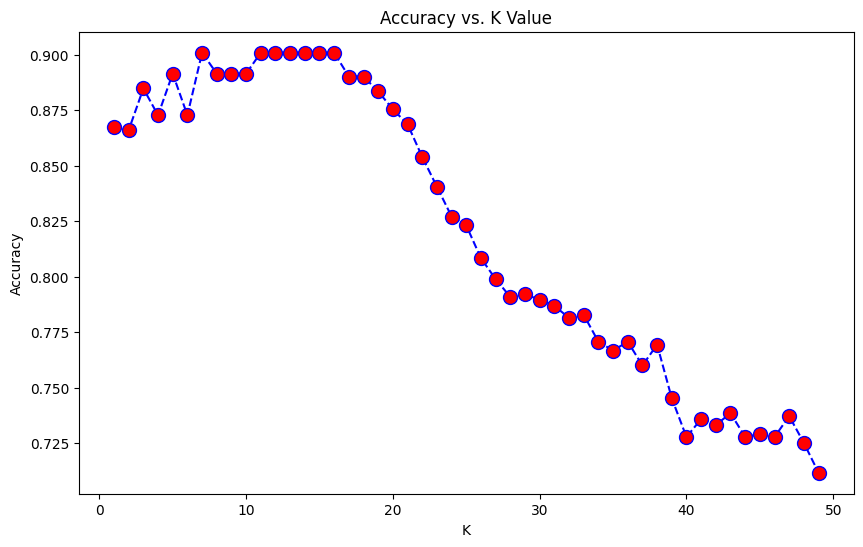

In [13]:
# Training KNN model and picking best number of neighbors

acc = []

for i in range(1, 50):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    knn_preds = knn_model.predict(X_test)
    acc.append(accuracy_score(y_test, knn_preds))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print(f"Maximum accuracy: {max(acc)} at K = {acc.index(max(acc))}")

A K value of 6 gave the highest accuracy at 0.90. Therefore, we will be using K = 6.

In [14]:
# Generating dataframe for predictions

knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
knn_df = df_pred.copy()
knn_df["Prediction"] = knn_preds
knn_df

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS,Prediction
316,3,3,4,4,4,3,3,4,0.0,0.0
2349,4,4,4,4,4,4,3,5,1.0,0.0
2549,4,3,3,4,5,4,3,5,0.0,0.0
891,4,3,4,2,2,2,2,5,0.0,0.0
1284,5,5,5,5,5,5,4,5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1477,5,4,4,4,4,4,4,3,1.0,1.0
933,4,3,3,3,5,3,3,3,0.0,0.0
438,3,4,4,4,3,4,3,5,1.0,1.0
2517,4,4,4,4,4,4,4,4,1.0,1.0


In [15]:
# Printing the rows that got the prediction wrong

wrong_knn_preds = knn_df[knn_df["Prediction"] != knn_df["CLASS"]]
wrong_knn_preds

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS,Prediction
2349,4,4,4,4,4,4,3,5,1.0,0.0
1714,4,3,3,3,3,3,2,5,1.0,0.0
1548,4,3,3,3,3,3,2,5,1.0,0.0
2836,4,3,4,4,4,3,3,5,0.0,1.0
1326,5,5,5,5,5,5,4,5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1626,4,4,4,4,3,3,3,5,0.0,1.0
670,4,3,4,4,4,3,3,5,0.0,1.0
452,5,5,5,5,5,5,4,5,1.0,0.0
1511,4,4,4,4,3,4,4,5,0.0,1.0


In [16]:
# Calculating the score of the model 

knn_score = accuracy_score(y_test, knn_preds)
knn_score

0.8726541554959786

The K-Nearest Neighbor Classification model managed to get around 87% of the employability classification correctly.

### 3. Support Vector Machine

In [17]:
# Training SVM model with linear kernel

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
# Generating dataframe for predictions

svm_preds = svm_model.predict(X_test)
svm_df = df_pred.copy()
svm_df["Prediction"] = svm_preds
svm_df

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS,Prediction
316,3,3,4,4,4,3,3,4,0.0,1.0
2349,4,4,4,4,4,4,3,5,1.0,1.0
2549,4,3,3,4,5,4,3,5,0.0,0.0
891,4,3,4,2,2,2,2,5,0.0,1.0
1284,5,5,5,5,5,5,4,5,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1477,5,4,4,4,4,4,4,3,1.0,1.0
933,4,3,3,3,5,3,3,3,0.0,0.0
438,3,4,4,4,3,4,3,5,1.0,1.0
2517,4,4,4,4,4,4,4,4,1.0,1.0


In [19]:
# Printing the rows that got the prediction wrong

wrong_svm_preds = svm_df[svm_df["Prediction"] != svm_df["CLASS"]]
wrong_svm_preds

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS,Prediction
316,3,3,4,4,4,3,3,4,0.0,1.0
891,4,3,4,2,2,2,2,5,0.0,1.0
1284,5,5,5,5,5,5,4,5,0.0,1.0
2419,4,4,4,4,4,4,4,5,0.0,1.0
2956,4,4,4,3,4,3,3,4,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1773,4,3,4,4,3,4,4,5,0.0,1.0
1583,5,3,5,4,5,5,3,5,1.0,0.0
1511,4,4,4,4,3,4,4,5,0.0,1.0
487,5,4,4,4,4,4,4,5,0.0,1.0


In [20]:
# Training SVM model with rbf kernel

svm_model_rbf = svm.SVC(kernel="rbf")
svm_model_rbf.fit(X_train, y_train)

SVC()

In [21]:
# Generating dataframe for predictions with rbf

svm_rbf_preds = svm_model_rbf.predict(X_test)
svm_rbf_df = df_pred.copy()
svm_rbf_df["Prediction"] = svm_rbf_preds
svm_rbf_df

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS,Prediction
316,3,3,4,4,4,3,3,4,0.0,0.0
2349,4,4,4,4,4,4,3,5,1.0,0.0
2549,4,3,3,4,5,4,3,5,0.0,0.0
891,4,3,4,2,2,2,2,5,0.0,0.0
1284,5,5,5,5,5,5,4,5,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1477,5,4,4,4,4,4,4,3,1.0,1.0
933,4,3,3,3,5,3,3,3,0.0,0.0
438,3,4,4,4,3,4,3,5,1.0,1.0
2517,4,4,4,4,4,4,4,4,1.0,1.0


In [22]:
# Printing the rows that got the prediction wrong with rbf

wrong_svm_rbf_preds = svm_rbf_df[svm_rbf_df["Prediction"] != svm_rbf_df["CLASS"]]
wrong_svm_rbf_preds

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS,Prediction
2349,4,4,4,4,4,4,3,5,1.0,0.0
1284,5,5,5,5,5,5,4,5,0.0,1.0
529,5,5,4,5,4,5,4,5,0.0,1.0
465,5,4,4,4,4,3,3,5,0.0,1.0
2836,4,3,4,4,4,3,3,5,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2865,5,5,5,5,5,5,5,5,0.0,1.0
670,4,3,4,4,4,3,3,5,0.0,1.0
1994,4,3,3,3,3,3,2,5,0.0,1.0
1511,4,4,4,4,3,4,4,5,0.0,1.0


In [23]:
# Calculating the score of the models

svm_score = accuracy_score(y_test, svm_preds)
svm_rbf_score = accuracy_score(y_test, svm_rbf_preds)

print(f"SVM with linear: {svm_score}\nSVM with RBF: {svm_rbf_score}")

SVM with linear: 0.5898123324396782
SVM with RBF: 0.8565683646112601


Support Vector Machine with the RBF Kernel managed to get around 86% of the classifications correctly.

In [24]:
%store logreg_score
%store knn_score
%store svm_score
%store svm_rbf_score

Stored 'logreg_score' (float64)
Stored 'knn_score' (float64)
Stored 'svm_score' (float64)
Stored 'svm_rbf_score' (float64)


# **Conclusion**

K-Nearest Neighbor Clasification managed to get the highest accuracy at around 87%, followed by Support Vector Machine (RBF) at 86%, Logistic Regression at 60%, and Support Vector Machine (Linear) at 59%. 